In [20]:
from RAG import RAG
import numpy as np
import matplotlib.pyplot as plt

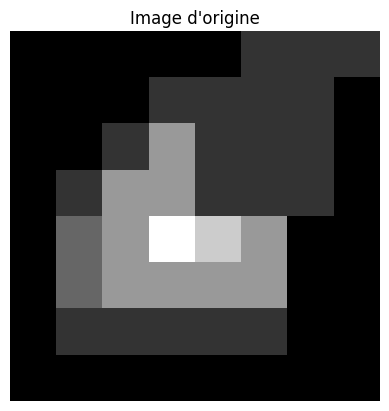

In [ ]:
img = np.array([
    [0, 0, 0, 0, 0, 5, 5, 5],
    [0, 0, 0, 5, 5, 5, 5, 0],
    [0, 0, 5, 15, 5, 5, 5, 0],
    [0, 5, 15, 15, 5, 5, 5, 0],
    [0, 10, 15, 25, 20, 15, 0, 0],
    [0, 10, 15, 15, 15, 15, 0, 0],
    [0, 5, 5, 5, 5, 5, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]
    ], dtype=int)

plt.title("Image d'origine")
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.show()

# Partie I : Division

L'arbre de la division de l'image :
           ┌─ 5
           ├─ 6
     ┌─ 1 ─┼─ 7
     │     │      ┌─ 17
     │     └─ 8  ─┼─ 18
     │            ├─ 19
     │            └─ 20
     ├─ 2
     │            ┌─ 21
     │     ┌─ 9  ─┼─ 22
─ 0 ─┤     │      ├─ 23
     │     │      └─ 24
     │     │      ┌─ 25
     ├─ 3 ─┼─ 10 ─┼─ 26
     │     │      ├─ 27
     │     │      └─ 28
     │     ├─ 11
     │     └─ 12
     │     ┌─ 13
     └─ 4 ─┼─ 14
           ├─ 15
           └─ 16
Le nombre de noeuds dans l'arbre :
29


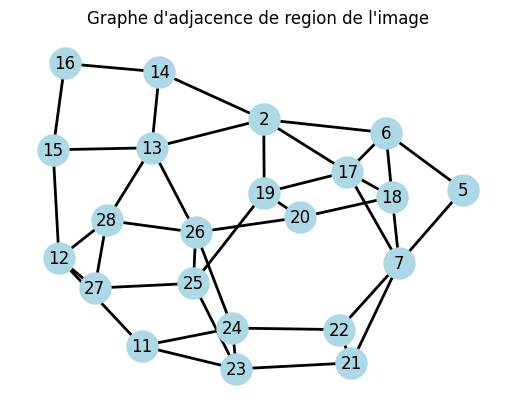

Le dictionnaire d'adjacence du RAG :
  2 : [13, 6, 17, 19, 14]
  5 : [7, 6]
  6 : [17, 2, 5, 18]
  7 : [5, 18, 22, 17, 21]
 11 : [23, 12, 24]
 12 : [28, 15, 27, 11]
 13 : [2, 14, 26, 28, 15]
 14 : [16, 13, 2]
 15 : [12, 16, 13]
 16 : [14, 15]
 17 : [6, 18, 2, 7, 19]
 18 : [20, 17, 7, 6]
 19 : [25, 20, 2, 17]
 20 : [18, 26, 19]
 21 : [22, 23, 7]
 22 : [21, 7, 24]
 23 : [25, 11, 24, 21]
 24 : [26, 23, 22, 11]
 25 : [23, 19, 27, 26]
 26 : [24, 20, 13, 28, 25]
 27 : [28, 12, 25]
 28 : [12, 27, 26, 13]


In [22]:
# Division
graphe = RAG(img)
split_thresh = 6
# |img(max) - img(min)| < split_thresh 
graphe.split(thresh=split_thresh)

# Affichage de l'arbre
graphe.print_quad_tree()
print("Le nombre de noeuds dans l'arbre :")
print(graphe.get_tree_size())

# Dessin du graphe
graphe.plot_graph()

# La représentation du graphe sous forme de dictionnaire d'adjacence
# Utile pour la 2eme partie (fusion)
print("Le dictionnaire d'adjacence du RAG :")
adj_dict = graphe.get_adj_dict()
for vertex in adj_dict:
    print(f"{vertex:3} : {adj_dict[vertex]}")

# Partie II : Fusion

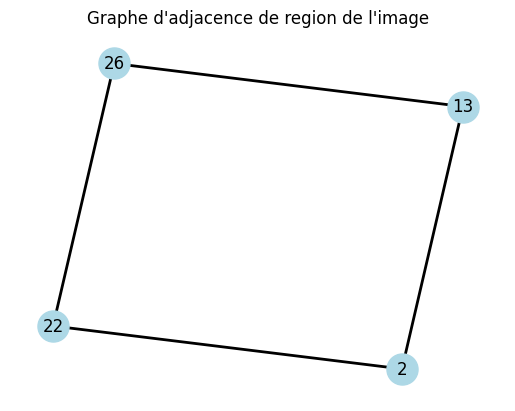

Le dictionnaire d'adjacence du RAG :
  2 : [13, 22]
 13 : [2, 26]
 22 : [2, 26]
 26 : [13, 22]


In [23]:
# La fusion est indépendante de la division
# pour tester plusieurs seuil de fusion je rajoute
# une division qui sert a réinitialiser
graphe.split(split_thresh)     
# Fusion
merge_thresh = 10
# |img(max) - img(min)| < merge_thresh; 
# where img is the union of two adjacent subimages
graphe.merge(thresh=merge_thresh)
graphe.plot_graph()
print("Le dictionnaire d'adjacence du RAG :")
adj_dict = graphe.get_adj_dict()
for vertex in adj_dict:
    print(f"{vertex:3} : {adj_dict[vertex]}")

# Partie III : Segmentation de l'image

 2 -> [2, 6, 17, 14, 5, 7, 16, 15, 21, 12, 23, 11]
13 -> [13, 28, 27, 25, 19, 20, 18]
22 -> [22, 24]
26 -> [26]


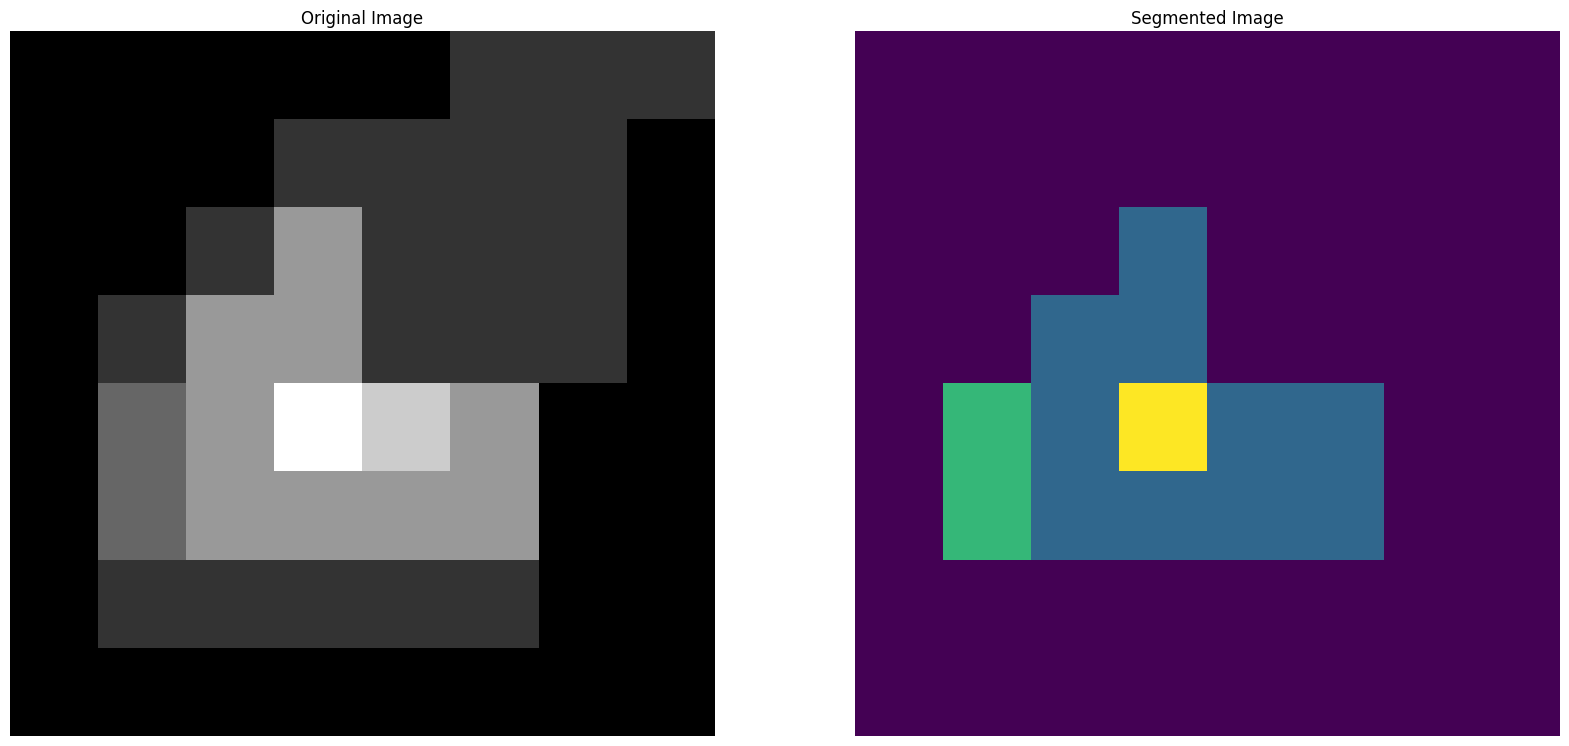

In [24]:
# L'arbre contient la trace de notre travail
# elle fera le travail d'index danse
for node in graphe.get_adj_dict():
    print(f"{node:2} -> {graphe.get_segment_components(node)}")  

segmented_img = graphe.launch_segmentation()
plt.figure(figsize=(20, 40))
plt.subplot(121), plt.title("Original Image"), plt.axis('off')
plt.imshow(img, cmap='gray')
plt.subplot(122), plt.title("Segmented Image"), plt.axis('off')
plt.imshow(segmented_img)
plt.show()